In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math

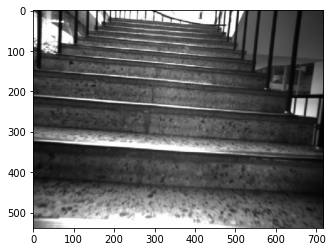

In [42]:
#reading and displaying grayscale input image
my_img = cv2.imread('sample_data/stairs2.png',0)
img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [104]:
kernel = cv2.getGaborKernel((31, 31), 5, 2, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

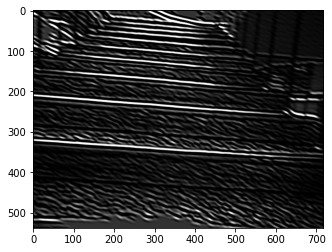

In [105]:
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(filtered)
plt.show()

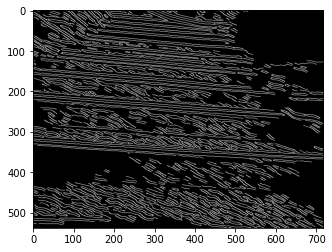

In [110]:
edges = cv2.Canny(filtered,100,200)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(edges)
plt.show()